In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder
# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split
# ALgorithm
from sklearn import tree
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
from sktime.performance_metrics.forecasting import median_relative_absolute_error

In [2]:
df = pd.read_csv('train.csv')

Text(0.5, 1.0, 'Correlations Between Variables')

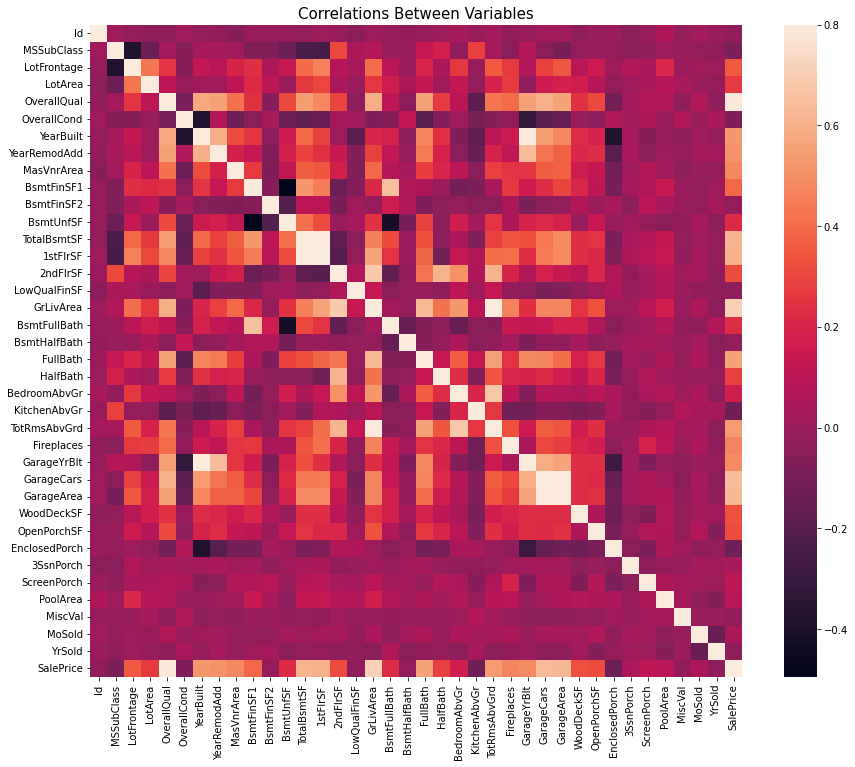

In [3]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.title("Correlations Between Variables", size=15)

In [5]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)

df = df[important_num_cols]

In [6]:
new_df=df.dropna(axis=0, how='any').copy()
new_df.describe(include='all')

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137,180921.195890
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


In [7]:
x = df.drop(['SalePrice'],axis=1).copy()
y = df['SalePrice'].copy()

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]
c = [10,20,42]

sum_1 = 0
sum_2 = 0
sum_3 = 0
sum_4 = 0
sum_5 = 0
sum_6 = 0
sum_7 = 0
sum_8 = 0
sum_9 = 0


for i in a:
    for j in b:
        model=SVR(kernel='rbf', C=i, epsilon=j)
        model.fit(x_train,y_train)
        CV5F_mse=cross_val_score(model,x_train,y_train,cv=3,scoring='neg_mean_squared_error')
        print('Training result')
        print('Each fold MSE:',CV5F_mse)
        print('Average MSE:',round((np.mean(CV5F_mse))*100,2),'+/-',round((np.std(CV5F_mse))*100,2))

Training result
Each fold MSE: [-6.11417085e+09 -8.30656796e+09 -5.08144049e+09]
Average MSE: -650072643399.49 +/- 134472567750.29
Training result
Each fold MSE: [-6.11417085e+09 -8.30656796e+09 -5.08144049e+09]
Average MSE: -650072643399.49 +/- 134472567750.29
Training result
Each fold MSE: [-6.11417085e+09 -8.30656796e+09 -5.08144049e+09]
Average MSE: -650072643399.49 +/- 134472567750.29
Training result
Each fold MSE: [-6.11417084e+09 -8.30656795e+09 -5.08144048e+09]
Average MSE: -650072642126.17 +/- 134472567604.65
Training result
Each fold MSE: [-6.11417084e+09 -8.30656795e+09 -5.08144048e+09]
Average MSE: -650072642126.17 +/- 134472567604.65
Training result
Each fold MSE: [-6.11417084e+09 -8.30656795e+09 -5.08144048e+09]
Average MSE: -650072642126.17 +/- 134472567604.65
Training result
Each fold MSE: [-5.02133821e+09 -6.96094487e+09 -4.05251453e+09]
Average MSE: -534493253381.64 +/- 120920820521.43
Training result
Each fold MSE: [-5.02133821e+09 -6.96094487e+09 -4.05251453e+09]
Av

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
model=SVR(kernel='rbf', C=2**8, epsilon=2e-10)
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

y_pred_benchmark = train_pred*1.1
train_mse = mean_squared_error(y_train,train_pred,squared=True)
train_rmse = mean_squared_error(y_train,train_pred, squared=False)
train_mape = mean_absolute_percentage_error(y_train,train_pred)
train_smape = 2*np.mean(np.abs(train_pred-y_train)/(np.abs(train_pred)+np.abs(y_train)))*100
train_mae = mean_absolute_error(y_train, train_pred)
train_mdrae = median_relative_absolute_error(y_train, train_pred, y_pred_benchmark=y_pred_benchmark)

y_pred_benchmark = test_pred*1.1
test_mse = mean_squared_error(y_test,test_pred,squared=True)
test_rmse = mean_squared_error(y_test,test_pred, squared=False)
test_mape = mean_absolute_percentage_error(y_test,test_pred)
test_smape = 2*np.mean(np.abs(test_pred-y_test)/(np.abs(test_pred)+np.abs(y_test)))*100
test_mae = mean_absolute_error(y_test, test_pred)
test_mdrae = median_relative_absolute_error(y_test, test_pred, y_pred_benchmark=y_pred_benchmark)

print('train_mse : ', np.round(train_mse,2))
print('train_rmse: ', np.round(train_rmse,2))
print('train_mape: ', np.round(train_mape,2))
print('train_smape: ', np.round(train_smape,2))
print('train_mae: ', np.round(train_mae,2))
print('train_mdrae: ', np.round(train_mdrae,2))
print('')
print('test_mse : ', np.round(test_mse,2))
print('test_rmse: ', np.round(test_rmse,2))
print('test_mape: ', np.round(test_mape,2))
print('test_smape: ', np.round(test_smape,2))
print('test_mae: ', np.round(test_mae,2))
print('test_mdrae: ', np.round(test_mdrae,2))

train_mse :  4830788385.82
train_rmse:  69503.87
train_mape:  0.27
train_smape:  25.09
train_mae:  46513.54
train_mdrae:  0.8

test_mse :  5581467465.09
test_rmse:  74709.22
test_mape:  0.25
test_smape:  24.18
test_mae:  46253.64
test_mdrae:  0.8
